# WeRateDogs Data Wrangling 

The following steps are to be made to complete this project
<ul>
    <li>Gathering Data </li>
    <li>Assessing Data </li>
    <li>Cleaning Data </li>
</ul>

In [102]:
import pandas as pd
import requests
import tweepy
import json
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%run secrets

## Gathering

#### 1) We collect the data for the archieves.

In [17]:
df_tweets = pd.read_csv('twitter-archive-enhanced.csv')
df_tweets.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [18]:
sum(df_tweets.duplicated()) #no duplicates 

0

In [19]:
df_tweets.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [20]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

#### 2) We retrieve the data from the image prediction model

In [21]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
resp = requests.get(url)


In [22]:
content = resp.content
file = open("image_predictions.tsv", "wb")

file.write(content)

file.close()

In [23]:
df_predictions = pd.read_csv("image_predictions.tsv", sep='\t')
df_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [24]:
df_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [25]:
df_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [26]:
sum(df_predictions.duplicated())

0

#### Apparently there are some retweets and replies, let's remove them first

In [27]:
print(df_tweets[df_tweets.retweeted_status_id.isnull()==False].tweet_id.count())
print(df_tweets[df_tweets.in_reply_to_status_id.isnull()==False].tweet_id.count())

181
78


In [28]:
df_tweets_cleaned = df_tweets[df_tweets.retweeted_status_id.isnull()==True]; # removing retweets
df_tweets_cleaned = df_tweets_cleaned[df_tweets_cleaned.in_reply_to_status_id.isnull()==True]; # removing replies

In [29]:
df_tweets_cleaned.tweet_id.count()

2097

#### 3) We retrieve the relevant data from Twitter API

In [30]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, 
                 parser = tweepy.parsers.JSONParser(),
                 wait_on_rate_limit = True,
                 wait_on_rate_limit_notify = True)

#test
tweet = api.get_status(df_tweets.tweet_id[0], tweet_mode='extended')
print( tweet.keys() )

dict_keys(['created_at', 'id', 'id_str', 'full_text', 'truncated', 'display_text_range', 'entities', 'extended_entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'possibly_sensitive_appealable', 'lang'])


In [32]:
with open('data.json', 'w') as outfile:
    json.dump(tweet,outfile)

In [33]:
with open('data.json') as json_file:
    data = json.load(json_file)
data

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'id': 892420643555336193,
 'id_str': '892420643555336193',
 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 'truncated': False,
 'display_text_range': [0, 85],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'url': 'https://t.co/MgUWQ76dJU',
    'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
     'small': {'w': 540, 'h': 528, 'resize': 'fit'},
     'large': {'w': 

I am trying to avoid running the next cell because it takes too much time, so I have run it once when I worked on the project the first few days. I will leave it as is and load the data from the file after I saved it.

In [193]:
failed = []
tweets_so_far = []
tweet_ids_so_far = []
for _id in df_tweets_cleaned.tweet_id:
    try:
        if _id not in tweet_ids_so_far:
            tweet = api.get_status(_id, tweet_mode='extended')
            data = {
                'tweet_id':int(_id),
                'retweet_count':int(tweet['retweet_count']),
                'favourites':int(tweet['favorite_count'])
            }
            tweets_so_far.append(data)
            tweet_ids_so_far.append(_id)
    except Exception as ex:
        print("Trouble in "+str(_id) + " " +str(ex))
        failed.append(_id)

Trouble in 872261713294495745 [{'code': 144, 'message': 'No status found with that ID.'}]
Trouble in 844704788403113984 [{'code': 144, 'message': 'No status found with that ID.'}]
Trouble in 837366284874571778 [{'code': 144, 'message': 'No status found with that ID.'}]
Trouble in 829374341691346946 [{'code': 144, 'message': 'No status found with that ID.'}]


Rate limit reached. Sleeping for: 271


Trouble in 779123168116150273 [{'code': 144, 'message': 'No status found with that ID.'}]
Trouble in 754011816964026368 [{'code': 144, 'message': 'No status found with that ID.'}]


Rate limit reached. Sleeping for: 309


Trouble in 680055455951884288 [{'code': 144, 'message': 'No status found with that ID.'}]


In [35]:
df_details = pd.DataFrame(tweets_so_far) #this method is better
df_details.to_json('tweet_json.txt')

In [36]:
df_tweet_details  = pd.read_json('tweet_json.txt')

In [37]:
df_tweet_details.head()

,tweet_id,retweet_count,favourites
0,892420643555336193,7696,36141
1,892177421306343426,5693,31170
2,891815181378084864,3775,23481
3,891689557279858688,7860,39426
4,891327558926688256,8469,37649


In [38]:
df_tweet_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2090 entries, 0 to 2089
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   tweet_id       2090 non-null   int64
 1   retweet_count  2090 non-null   int64
 2   favourites     2090 non-null   int64
dtypes: int64(3)
memory usage: 65.3 KB


## Assessing

#### Assessing archieve data

In [39]:
df_tweets_cleaned.to_csv("twitter-archive-enhanced2.0.csv") #for visual assessment

In [40]:
df_tweets_cleaned.name.value_counts()

None       603
a           55
Charlie     11
Lucy        11
Cooper      10
          ... 
Peanut       1
Dex          1
Canela       1
Josep        1
Edmund       1
Name: name, Length: 955, dtype: int64

In [41]:
df_tweets_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

In [42]:
df_tweets_cleaned.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'such', 'Canela',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Steven', 'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny',
       'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget',
       'Cash', 'Jed', 'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody',
       'Lassie', 'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble',
       'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper',
       'Harold', 'Shikha', 'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball',
       'Paisley', 'Albus', 'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave',
    

In [43]:
df_tweets_cleaned.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.097000e+03,0.0,0.0,0.0,0.0,2097.000000,2097.000000
mean,7.365594e+17,NaN,NaN,NaN,NaN,12.189318,10.448736
std,6.710178e+16,NaN,NaN,NaN,NaN,40.364996,6.645061
min,6.660209e+17,NaN,NaN,NaN,NaN,0.000000,2.000000
25%,6.768197e+17,NaN,NaN,NaN,NaN,10.000000,10.000000
50%,7.098528e+17,NaN,NaN,NaN,NaN,11.000000,10.000000
75%,7.877176e+17,NaN,NaN,NaN,NaN,12.000000,10.000000
max,8.924206e+17,NaN,NaN,NaN,NaN,1776.000000,170.000000


In [44]:
df_tweets_cleaned.rating_denominator.unique()

array([ 10,  70,   7, 150,  11, 170,  20,  50,  90,  80,  40, 110, 120,
         2], dtype=int64)

In [45]:
sum(df_tweets_cleaned.duplicated())

0

In [46]:
sum(df_tweets_cleaned.source.duplicated())

2093

In [47]:
sum(df_tweets_cleaned.expanded_urls.duplicated())

3

#### Assessing predictions data

In [48]:
df_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [49]:
df_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [50]:
df_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [51]:
print(df_predictions.p1_dog.value_counts())
print(df_predictions.p2_dog.value_counts())
print(df_predictions.p3_dog.value_counts())

True     1532
False     543
Name: p1_dog, dtype: int64
True     1553
False     522
Name: p2_dog, dtype: int64
True     1499
False     576
Name: p3_dog, dtype: int64


In [52]:
sum(df_predictions.jpg_url.duplicated())

66

#### Assessing Twitter API data

In [53]:
df_tweet_details

,tweet_id,retweet_count,favourites
0,892420643555336193,7696,36141
1,892177421306343426,5693,31170
2,891815181378084864,3775,23481
3,891689557279858688,7860,39426
4,891327558926688256,8469,37649
...,...,...,...
2085,666049248165822465,40,96
2086,666044226329800704,131,272
2087,666033412701032449,41,112
2088,666029285002620928,42,121


In [54]:
df_tweet_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2090 entries, 0 to 2089
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   tweet_id       2090 non-null   int64
 1   retweet_count  2090 non-null   int64
 2   favourites     2090 non-null   int64
dtypes: int64(3)
memory usage: 65.3 KB


In [55]:
sum(df_tweet_details.duplicated())

0

In [56]:
print(sum(df_tweet_details.tweet_id.isna()))
print(sum(df_tweet_details.retweet_count.isna()))
print(sum(df_tweet_details.favourites.isna()))

0
0
0


In [57]:
print(sum(df_tweet_details.tweet_id.isnull()))
print(sum(df_tweet_details.retweet_count.isnull()))
print(sum(df_tweet_details.favourites.isnull()))

0
0
0


In [58]:
print(sum(df_tweet_details.tweet_id.duplicated()))

0


From visual and programmatic assessments, we can find the following:

#### Archieve
<ol> 
    <li> Data is untidy because of the dogtionary labels</li>
    <li> Also untidy, unwanted retweets and replies (already removed before using the API) </li>
    <li> Many names are None, some could be misinterpreted as an, a, the, etc. </li>
    <li> Time stamp not date-time type </li>
    <li> We have 5 empty columns, another has some missing values </li>
    <li> Source has anchor tags on it </li>
    <li> Very unusual rating numerator and denominators (After taking a look, apparently these oversized rates are given for the presence of multiple dogs at the same time) </li>
    <li> 3 duplicate expanded urls </li>
    <li> 2 overvalued numerators, one of them is snoopdog </li>
    <li> Some tweets contain floats which were chopped (9.75/10 -> 75/10)</li>
</ol>

#### Predictions

<ol> 
    <li> Many predictions don't indicate it's dog at all </li>
    <li> Predictions dataset is smaller than the archieve, even after removing retweets and replies </li> 
    <li> Extra columns for prediction are unecessary, it is making the data untidy</li>
    <li> Duplicate photos</li>
</ol>

#### Twitter API data
<ul> 
    <li>API dataset smaller than archieve, even after removing retweets and replies, some tweets are missing </li>
    
</ul>


## Cleaning

With the previous remarks given in the assessment, we could clean each dataset individually and combined them together later.

### Cleaning Archieve 

I have already started cleaning by removing retweets and replies, because I wanted to reduce the amount of times I called the twitter API so that's one step done already

In [59]:
df_tweets_cleaned.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


**Remove unecessary columns**

In [60]:
df_archieve_copy = df_tweets_cleaned.drop(['in_reply_to_status_id',
                       'in_reply_to_user_id',
                      'retweeted_status_id',
                       'retweeted_status_user_id',
                      'retweeted_status_timestamp'],axis=1)

In [61]:
df_archieve_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


**Make timestamp a datetime type**

In [62]:
time = pd.to_datetime(df_archieve_copy['timestamp'], format="%Y-%m-%d %H:%M:%S %z")
time

0      2017-08-01 16:23:56+00:00
1      2017-08-01 00:17:27+00:00
2      2017-07-31 00:18:03+00:00
3      2017-07-30 15:58:51+00:00
4      2017-07-29 16:00:24+00:00
                  ...           
2351   2015-11-16 00:24:50+00:00
2352   2015-11-16 00:04:52+00:00
2353   2015-11-15 23:21:54+00:00
2354   2015-11-15 23:05:30+00:00
2355   2015-11-15 22:32:08+00:00
Name: timestamp, Length: 2097, dtype: datetime64[ns, UTC]

In [63]:
df_archieve_copy['timestamp'] = time

In [64]:
df_archieve_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                2097 non-null   object             
 8   doggo               2097 non-null   object             
 9   floofer             2097 non-null   object             
 10  pupper              2097 non-null   object             
 11  puppo               2097 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

**Unifying the dogtionary**

In [65]:
# Checking that no noise is in the dogtionary(should have done that earlier)
print(df_archieve_copy['floofer'].unique()) 
print(df_archieve_copy['puppo'].unique()) 
print(df_archieve_copy['doggo'].unique()) 
print(df_archieve_copy['pupper'].unique()) 

['None' 'floofer']
['None' 'puppo']
['None' 'doggo']
['None' 'pupper']


In [66]:
(df_archieve_copy['puppo']+' ' +df_archieve_copy['doggo']).head(10).replace('None ', '')
#this did not work

0     None None
1     None None
2     None None
3     None None
4     None None
5     None None
6     None None
7     None None
8     None None
9    None doggo
dtype: object

In [67]:
df_archieve_copy['puppo'].replace('None', '')

0        
1        
2        
3        
4        
       ..
2351     
2352     
2353     
2354     
2355     
Name: puppo, Length: 2097, dtype: object

In [68]:
df_archieve_copy['doggo'] = df_archieve_copy['doggo'].replace('None', 'NaN')
df_archieve_copy['puppo'] = df_archieve_copy['puppo'].replace('None', 'NaN')
df_archieve_copy['floofer'] = df_archieve_copy['floofer'].replace('None', 'NaN')
df_archieve_copy['pupper'] = df_archieve_copy['pupper'].replace('None', 'NaN')

In [69]:
df_archieve_copy['dogtionary'] = (df_archieve_copy['doggo']+df_archieve_copy['puppo']+
                                  df_archieve_copy['floofer']+df_archieve_copy['pupper'])


In [70]:
df_archieve_copy2 = df_archieve_copy.drop(['doggo','floofer',
                                           'pupper','puppo',],axis=1)

In [71]:
df_archieve_copy2.head(20)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dogtionary
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaNNaNNaNNaN
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaNNaNNaNNaN
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaNNaNNaNNaN
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaNNaNNaNNaN
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaNNaNNaNNaN
5,891087950875897856,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,NaNNaNNaNNaN
6,890971913173991426,2017-07-28 16:27:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaNNaNNaNNaN
7,890729181411237888,2017-07-28 00:22:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,NaNNaNNaNNaN
8,890609185150312448,2017-07-27 16:25:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaNNaNNaNNaN
9,890240255349198849,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggoNaNNaNNaN


In [72]:
df_archieve_copy2['dogtionary'].unique()

array(['NaNNaNNaNNaN', 'doggoNaNNaNNaN', 'NaNpuppoNaNNaN',
       'NaNNaNNaNpupper', 'NaNNaNflooferNaN', 'doggopuppoNaNNaN',
       'doggoNaNflooferNaN', 'doggoNaNNaNpupper'], dtype=object)

**Removing bad names**

In [73]:
def findLowerCases(x):
    if(x.islower()): return x

In [74]:
df_tweets_cleaned.name.apply(lambda x: findLowerCases(x)).unique()

array([None, 'such', 'a', 'quite', 'not', 'one', 'incredibly', 'very',
       'my', 'his', 'an', 'actually', 'just', 'getting', 'mad', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

In [75]:
badNames = ["None", 'such', 'a', 'quite', 'not', 'one', 'incredibly', 'very',
       'my', 'his', 'an', 'actually', 'just', 'getting', 'mad', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space']
for i in badNames:
    df_archieve_copy2['name'].replace(i,'NaN',inplace=True)

In [76]:
df_archieve_copy2.name.value_counts()

NaN        707
Charlie     11
Lucy        11
Oliver      10
Cooper      10
          ... 
Buckley      1
Miley        1
Peanut       1
Dex          1
Edmund       1
Name: name, Length: 930, dtype: int64

**Changing the denominators**

Two easy choices

1) Just delete them, they are few.

2) Take a small look and remove the unecessary ones

After taking another look, I have decided that there are 5 cases where the numbers are given by mistake (24/7,50/50 split, 9/11 survivor)

I could change them manually easily

In [77]:
df_archieve_copy2.to_csv("twitter-archive-enhanced3.0.csv")

This is getting even stranger, I found a patriotic dog with 1776 numerator (because American independence), and the rapper Snoopdog with 420. I will remove those.

There are also some floats, those numerators should be turned to int

The rest could be move to a scale of 10


In [78]:
df_archieve_copy3 = pd.read_excel('twitter-archive-enhanced4.0.xls')
df_archieve_copy3.to_csv("twitter-archive-enhanced4.0.csv")
df_archieve_copy3 = pd.read_csv('twitter-archive-enhanced4.0.csv')
del df_archieve_copy3['Unnamed: 0']

In [79]:
df_archieve_copy3.rating_numerator.value_counts()

12.00     486
10.00     437
11.00     415
13.00     288
9.00      153
8.00       98
7.00       51
14.00      39
5.00       33
6.00       32
3.00       19
4.00       15
2.00        9
1.00        4
60.00       1
44.00       1
80.00       1
84.00       1
88.00       1
144.00      1
99.00       1
13.50       1
165.00      1
0.00        1
11.27       1
121.00      1
45.00       1
9.75        1
204.00      1
Name: rating_numerator, dtype: int64

In [80]:
df_archieve_copy3["rating_numerator"] = df_archieve_copy3["rating_numerator"].astype("int64")
df_archieve_copy3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2094 entries, 0 to 2093
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2094 non-null   int64 
 1   timestamp           2094 non-null   object
 2   source              2094 non-null   object
 3   text                2094 non-null   object
 4   expanded_urls       2091 non-null   object
 5   rating_numerator    2094 non-null   int64 
 6   rating_denominator  2094 non-null   int64 
 7   name                1421 non-null   object
 8   dogtionary          336 non-null    object
dtypes: int64(3), object(6)
memory usage: 147.4+ KB


In [81]:
#scaling the numerators on scale of 10 denominator, now we don't need denominator and we can remove it
df_archieve_copy3["rating_numerator"] = ((df_archieve_copy3['rating_numerator']*10)/df_archieve_copy3['rating_denominator']).astype("int64")
df_archieve_copy4 = df_archieve_copy3.drop('rating_denominator', axis=1)

In [82]:
df_archieve_copy4["rating_numerator"] .value_counts()

12    490
10    438
11    421
13    289
9     155
8      98
7      51
14     39
5      33
6      32
3      19
4      15
2       9
1       4
0       1
Name: rating_numerator, dtype: int64

**Remove html tags from source**

In [83]:
import re

def cleanhtml(raw_html):
  cleanr = re.compile('<.*?>')
  cleantext = re.sub(cleanr, '', raw_html)
  return cleantext

In [84]:
df_archieve_copy4.source.apply(lambda s: cleanhtml(s)).value_counts()

Twitter for iPhone     1962
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                10
Name: source, dtype: int64

In [85]:
df_archieve_copy4.source = df_archieve_copy4.source.apply(lambda s: cleanhtml(s))

### Cleaning Predictions 

In [86]:
df_predictions.to_excel("predictions.xls")

In [87]:
df_predictions_copy = df_predictions.copy()

In [88]:
df_predictions_copy[df_predictions_copy['p1_conf']<df_predictions_copy['p3_conf']]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [89]:
df_predictions_copy[df_predictions_copy['p1_conf']<df_predictions_copy['p2_conf']]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


**Merging predictions**


We know that the first prediction is always the most confidente, we can remove the others.

We also don't need the confidence, we will just remove it.

In [90]:
df_predictions_copy2=df_predictions_copy.drop(['p1_conf','p2_conf',
                                           'p3_conf','p2','p2_dog',
                                              'p3','p3_dog'],axis=1)


In [91]:
df_predictions_copy2.rename(columns={'p1':"predictions",'p1_dog':'is_dog'},inplace=True)

In [92]:
df_predictions_copy2

,tweet_id,jpg_url,img_num,predictions,is_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,True
...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,True


No need to clean the API data we can move on to merging the datasets

### Merging the Dataset Frames

In [93]:
df_archieve_copy4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2094 entries, 0 to 2093
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2094 non-null   int64 
 1   timestamp         2094 non-null   object
 2   source            2094 non-null   object
 3   text              2094 non-null   object
 4   expanded_urls     2091 non-null   object
 5   rating_numerator  2094 non-null   int64 
 6   name              1421 non-null   object
 7   dogtionary        336 non-null    object
dtypes: int64(2), object(6)
memory usage: 131.0+ KB


In [94]:
df_predictions_copy2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   tweet_id     2075 non-null   int64 
 1   jpg_url      2075 non-null   object
 2   img_num      2075 non-null   int64 
 3   predictions  2075 non-null   object
 4   is_dog       2075 non-null   bool  
dtypes: bool(1), int64(2), object(2)
memory usage: 67.0+ KB


In [96]:
df_tweet_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2090 entries, 0 to 2089
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   tweet_id       2090 non-null   int64
 1   retweet_count  2090 non-null   int64
 2   favourites     2090 non-null   int64
dtypes: int64(3)
memory usage: 65.3 KB


After merging all the dataframes, we get a heavily reduced dataset.

This is most probably due to removing retweets from predictions, as it is expected that the prediction model used all images at hand, including retweets, which are not used in the dataset.

After testing with different merges, predictions are indeed the most losing.
We could preserve incomplete datasets if we put "how = 'left ", but we want complete datasets, this is why we will not merge them from left.

In [198]:
df_final = pd.merge(df_archieve_copy4,df_tweet_details,  on = ['tweet_id'] )
df_final = pd.merge(df_final, df_predictions_copy2, on = ['tweet_id'])
df_final.to_csv('twitter_archive_master.csv')
df_final.to_excel('twitter_archive_master.xls')
#I am storing excel version because I am using Open office, 
#and it does not support csv as spreadsheet


In [199]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1961 entries, 0 to 1960
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          1961 non-null   int64 
 1   timestamp         1961 non-null   object
 2   source            1961 non-null   object
 3   text              1961 non-null   object
 4   expanded_urls     1961 non-null   object
 5   rating_numerator  1961 non-null   int64 
 6   name              1368 non-null   object
 7   dogtionary        302 non-null    object
 8   retweet_count     1961 non-null   int64 
 9   favourites        1961 non-null   int64 
 10  jpg_url           1961 non-null   object
 11  img_num           1961 non-null   int64 
 12  predictions       1961 non-null   object
 13  is_dog            1961 non-null   bool  
dtypes: bool(1), int64(5), object(8)
memory usage: 216.4+ KB


In [200]:
df_final.describe()

,tweet_id,rating_numerator,retweet_count,favourites,img_num
count,1.961000e+03,1961.000000,1961.000000,1961.000000,1961.000000
mean,7.358030e+17,10.541050,2466.173891,8302.979602,1.202448
std,6.745542e+16,2.165941,4410.347487,12214.803426,0.559987
min,6.660209e+17,0.000000,11.000000,70.000000,1.000000
25%,6.758457e+17,10.000000,550.000000,1783.000000,1.000000
50%,7.087111e+17,11.000000,1192.000000,3751.000000,1.000000
75%,7.877176e+17,12.000000,2819.000000,10350.000000,1.000000
max,8.924206e+17,14.000000,77677.000000,155860.000000,4.000000


## Cleaning

As we can see from this bar chart puppers are the most frequent posts in our dataset.

We can also ignore the combined categories (e.g. doggopuppo) because they are very negligible 

Text(0.5, 1.0, 'Frequency in dogtionary')

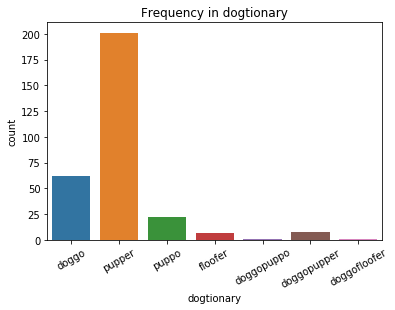

In [201]:
sns.countplot(data=df_final,x="dogtionary")
plt.xticks(rotation=30)
plt.title("Frequency in dogtionary")

From this scatter plot, we can see that there is a correlation between number of favourites and retweet_count, because more retweet equals more favourites. And we can also notice that doggos are by far the most popular.

Text(0.5, 1.0, 'retweets vs favourites')

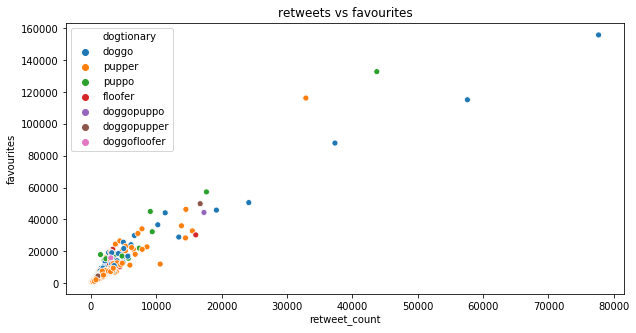

In [202]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df_final,x='retweet_count',y='favourites',hue='dogtionary')
plt.title("retweets vs favourites")

We can find from this chart that there is a relationship between increasing numerator and the increase in the number of retweets and favourites, this relationship however only appears at the very end of the spectrum after the 9s rating, this essentially means that the popularity of a single photo almost entirely relies on the numerator and not the merit of the dog's beauty itself. 

Strangly enough the very lowest at 0 and 1 rating are very high, meaning that the community appreciates underdogs (no pun intended)

Text(0.5, 1.0, 'rating vs favourites')

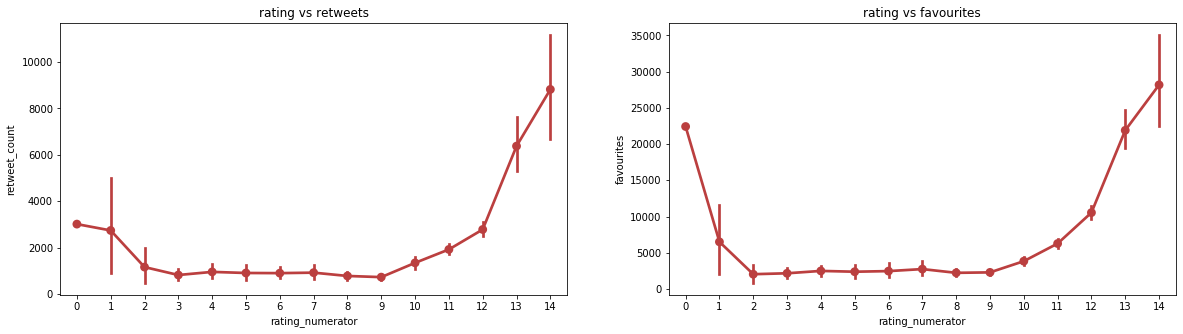

In [203]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
ax1 = sns.pointplot("rating_numerator", y="retweet_count", data=df_final,
                   color="#bb3f3f")


plt.subplot(1, 2, 2)
ax2 = sns.pointplot("rating_numerator", y="favourites", data=df_final,
                   color="#bb3f3f")
ax1.set_title("rating vs retweets")
ax2.set_title("rating vs favourites")

In [204]:
df_final.groupby("predictions").predictions.value_counts()

predictions          predictions        
Afghan_hound         Afghan_hound            3
African_crocodile    African_crocodile       1
African_grey         African_grey            1
African_hunting_dog  African_hunting_dog     1
Airedale             Airedale               12
                                            ..
wombat               wombat                  4
wood_rabbit          wood_rabbit             3
wooden_spoon         wooden_spoon            1
wool                 wool                    2
zebra                zebra                   1
Name: predictions, Length: 372, dtype: int64

The next plot will try to find the most popular breeds, however since there are too many predictions, I will only take the 4 most popular

In [205]:
df_final['predictions'].value_counts().nlargest(5)

golden_retriever      136
Labrador_retriever     92
Pembroke               88
Chihuahua              78
pug                    54
Name: predictions, dtype: int64

In [206]:
mostPopular = list(df_final['predictions'].value_counts().nlargest(5).index)
df_most_popular = df_final[(df_final['predictions'].isin(mostPopular))]

We can conclude that while the golden retriever is the most mentioned breed, labradors are quite more poplar

Text(0.5, 1.0, 'Most Popular dogs by favourites')

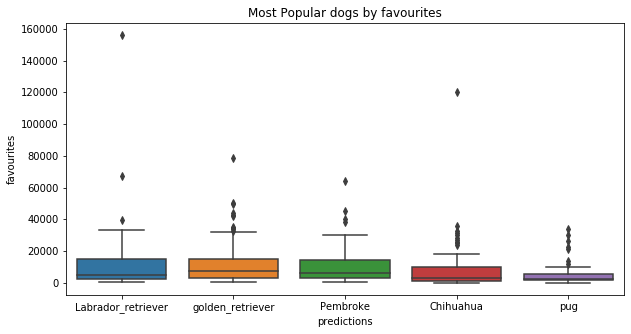

In [207]:
plt.figure(figsize=(10,5))

ax2 = sns.boxplot( data=df_most_popular,y="favourites", x = 'predictions')

plt.title("Most Popular dogs by favourites")

Text(0.5, 1.0, 'Most Popular dogs by retweets')

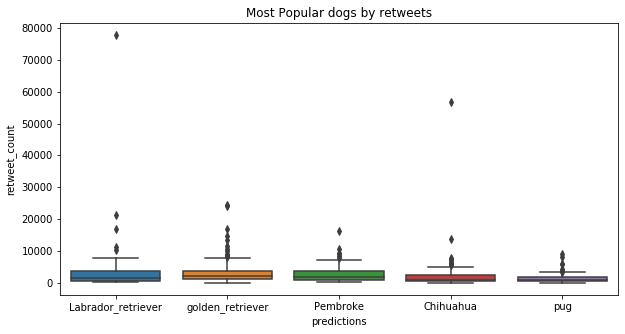

In [208]:
plt.figure(figsize=(10,5))

ax1 = sns.boxplot( data=df_most_popular,y="retweet_count", x = 'predictions')

plt.title("Most Popular dogs by retweets")

#### Conclusions summary

<ul>
    <li> There is a relation between retweets counts and favourites </li>
    <li> Puppers are the most common dogs</li>
    <li> Doggos are the second most common yet the most popular</li>
    <li> The popularity depends entirely on the score given by the page, whether underdogs or over-scored  dogs</li>
    <li> Golden retrievers are the most frequently tweeted, however labradors are the most popular</li>
    
</ul>
